<center> <h1> Phishing Website Detection based on Supervised Machine Learning with
Wrapper Features Selection </h1> </center>

## Eksploratorna analiza i priprema podataka

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Učitavanje i dimenzionalnost podataka

In [182]:
data = pd.read_csv('data/training_dataset.csv', index_col=0)
print(f'Dimenzionalnost podataka: {data.shape}')

Dimenzionalnost podataka: (11055, 31)


In [183]:
print('Prvih 5 redova DataFramea: ')
data.head()

Prvih 5 redova DataFramea: 


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
id,,,,,,,,,,,,,,,,,,,,,
1,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
2,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
3,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
4,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
5,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Opis skupa podataka

In [184]:
print('Nazivi značajki i odgovarajući tipovi podataka: ')
data.dtypes

Nazivi značajki i odgovarajući tipovi podataka: 


having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

Značajke:
 - having_IP_Address* - koristi li se IP adresa unutar URL-a
 - URL_Length** - duljina URL-a podijeljena u klase
 - Shortining_Service* - koristi li se servis za skraćivanje URL-a
 - having_At_Symbol* - sadrži li URL simbol `@`
 - double_slash_redirecting* - pojavljuje li se `//` više od jednom
 - Prefix_Suffix* - sadrži li ime domene znak `-`
 - having_Sub_Domain** - sadrži li ULR poddomenu
 - SSLfinal_State** - koristi li se HTTPS te je li izdavatelj vjerodostojan
 - Domain_registeration_length* - je li životni vijek domene dulji od jedne godine
 - Favicon* - je li Favicon učitan iz vanjske domene
 - port* - koristi li se nesiguran port
 - HTTPS_token* - koristi li se HTTPS token u domenskom dijelu URL-a
 - Request_URL** - udio zahtjeva iz vanjske domene prilikom učitavanja stranice
 - URL_of_Anchor** - udio `<a>` tagova koji pokazuju na vanjske domene ili ne pokazuju ni na što
 - Links_in_tags** - udio linkova u `<Meta>`, `<Script>`, `<Link>` tagovima
 - SFH(_Server Form Handler_)** - prosljeđuju li se podatci iz forme igdje te ako jesu šalju li se u vanjsku domenu
 - Submitting_to_email* - prosljeđuju li se podatci iz forme na mail
 - Abnormal_URL* - je li ime hosta sadržano u URL-u
 - Redirect* - broj preusmjeravanja na stranici
 - on_mouseover* - mijenja li `onMouseOver` događaj traku statusa
 - RightClick* - je li onemogućen desni klik
 - popUpWindow* - sadrži li stranica iskočni prozor u koji se upisuju informacije
 - Iframe* - koristi li se `<iframe>` tag
 - age_of_domain* - je li domena starija od 6 mjeseci
 - DNSRecord* - postoji li DNS zapis o domeni
 - web_traffic** - rank u `Alexa` bazi podataka (broj posjećivanja stranice)
 - Page_Rank* - je li PageRank manji od 0.2
 - Google_Index* - je li stranica indeksirana od strane Google-a
 - Links_pointing_to_page* - broj linkova koji pokazuju na stranicu
 - Statistical_report* - host pripada u `Top Phishing IPs` ili `Top Phishing Domains`
 - Result* - ciljani razred - služi li stranica za phishing


*značajka je podijeljena u dvije klase: (-1: signurno, 1: phishing)
**značajka je podijeljena u tri klase: (-1: signurno, 0: sumnjivo, 1: phishing)

## Nedostajuće vrijednosti

In [185]:
data.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [186]:
data.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

Iz prethodnih ćelija vidljivo je kako nema nedostajućih vrijednosti u skupu podataka.

## Monotone varijable

In [187]:
data.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

Funkcija `nunique` vraća broj jedinstvenih vrijednosti po stupcima. Vidljivo je da nema značajki koje bi bile kandidati za monotone varijable.

## Deskriptivne statistike

Kako su sve značajke kategoričke i tipa `int64` ne možemo dobiti primjerenu deskriptivnu statistiku naredbom `describe`. Stoga je za svaku značajku izračunata frekvencija pojavljivanja svake oznake te udio pojavljivanja te oznake u svim podatcima.

In [188]:
for column in data:
    print(f'{column:}')
    temp_df = pd.DataFrame(columns=['value', 'frequency', 'percent'])
    for index, value in enumerate(sorted(data[column].unique())):
        frequency = len(data[data[column] == value])
        temp_df.loc[index] = [value, frequency, round(frequency / len(data[column]) * 100, 2)]


    print(temp_df.to_string(index=False))
    print()

having_IP_Address
 value  frequency  percent
  -1.0     3793.0    34.31
   1.0     7262.0    65.69

URL_Length
 value  frequency  percent
  -1.0     8960.0    81.05
   0.0      135.0     1.22
   1.0     1960.0    17.73

Shortining_Service
 value  frequency  percent
  -1.0     1444.0    13.06
   1.0     9611.0    86.94

having_At_Symbol
 value  frequency  percent
  -1.0     1655.0    14.97
   1.0     9400.0    85.03

double_slash_redirecting
 value  frequency  percent
  -1.0     1429.0    12.93
   1.0     9626.0    87.07

Prefix_Suffix
 value  frequency  percent
  -1.0     9590.0    86.75
   1.0     1465.0    13.25

having_Sub_Domain
 value  frequency  percent
  -1.0     3363.0    30.42
   0.0     3622.0    32.76
   1.0     4070.0    36.82

SSLfinal_State
 value  frequency  percent
  -1.0     3557.0    32.18
   0.0     1167.0    10.56
   1.0     6331.0    57.27

Domain_registeration_length
 value  frequency  percent
  -1.0     7389.0    66.84
   1.0     3666.0    33.16

Favicon
 value  

## Grafički prikaz distribucija

Metoda `plot_distribution(feature)` služi za paralelno iscrtavanje pitnog istupčastog dijagrama nad pojedinom značajkom skupa podataka.

In [189]:
def plot_distribution(feature):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    feature.value_counts().plot(kind='pie', startangle=90)
    plt.subplot(1, 2, 2)
    feature.plot(kind='hist')
    plt.show()

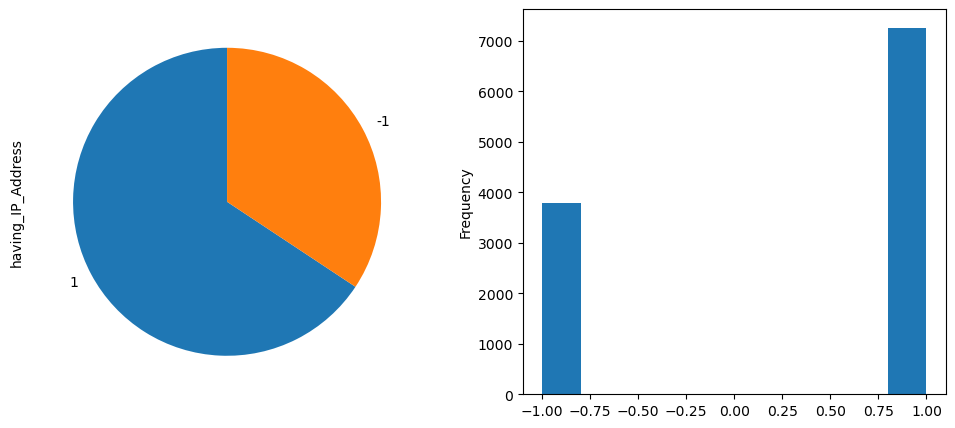

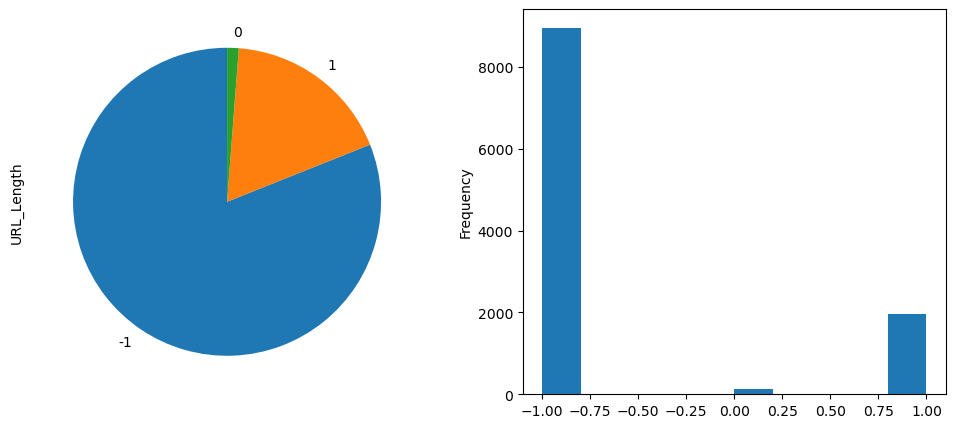

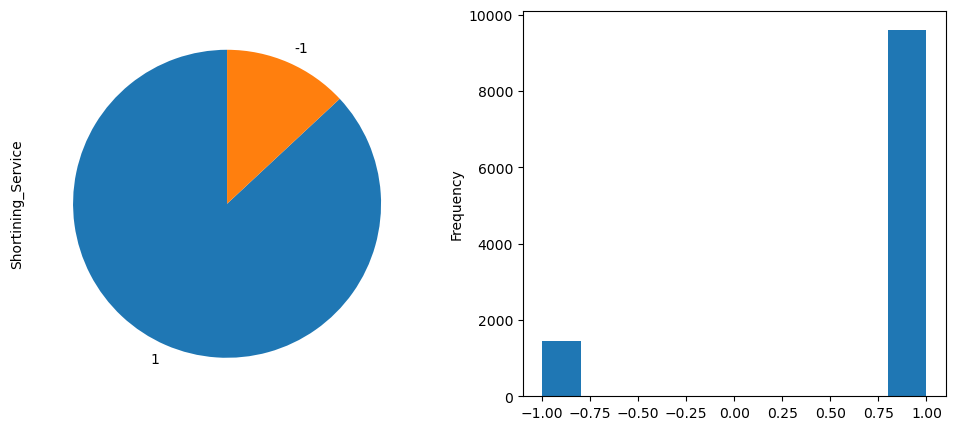

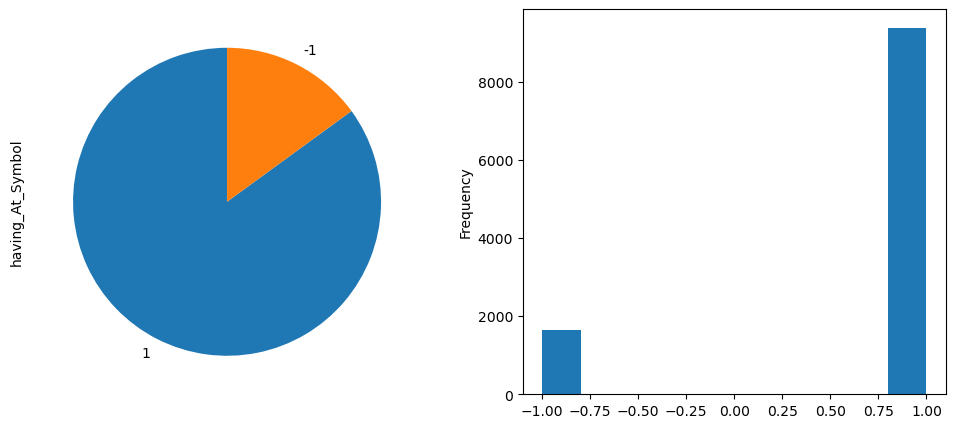

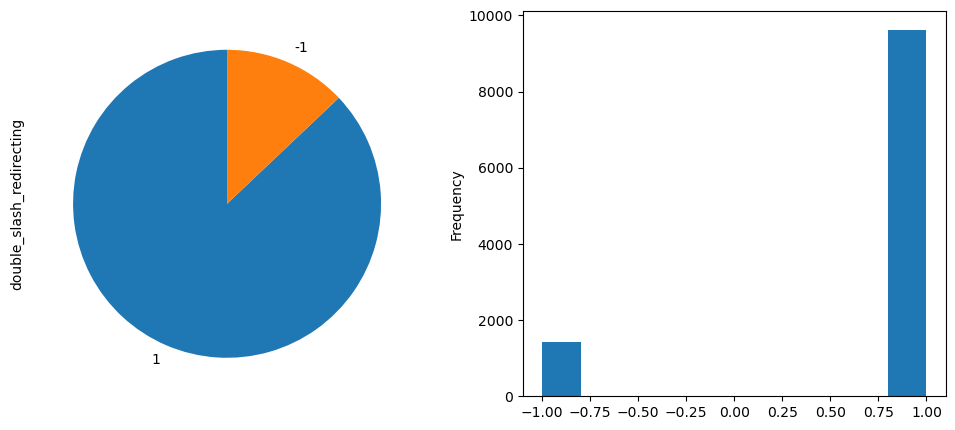

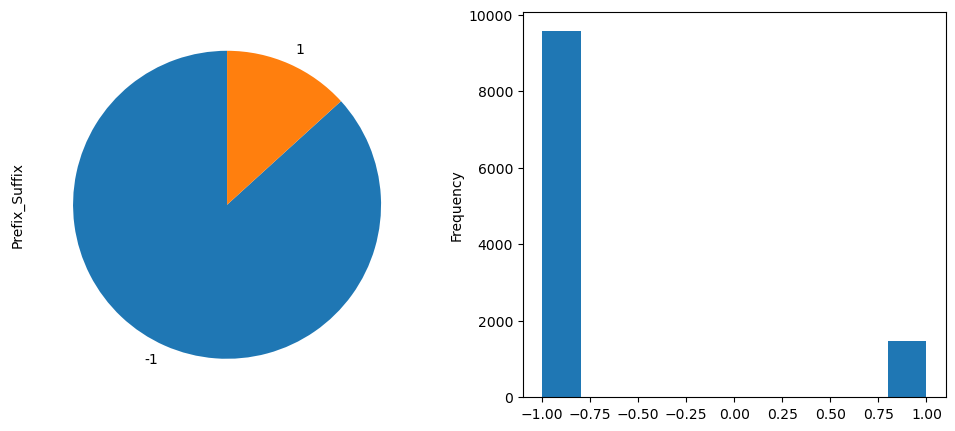

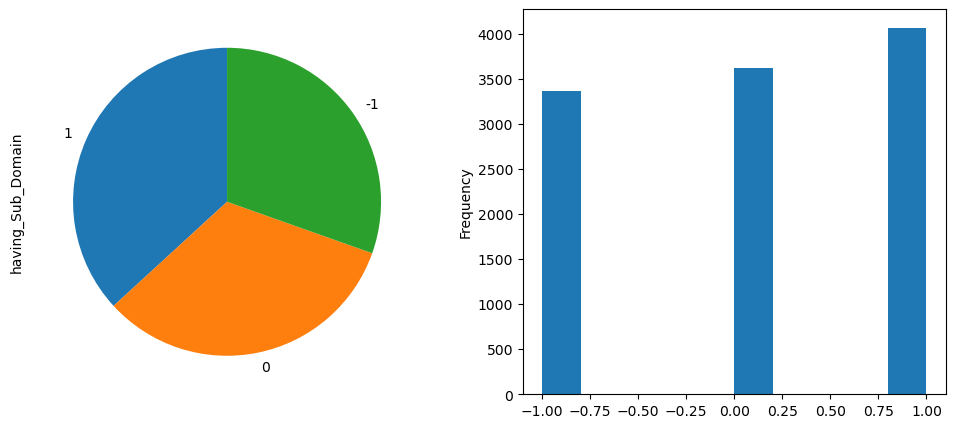

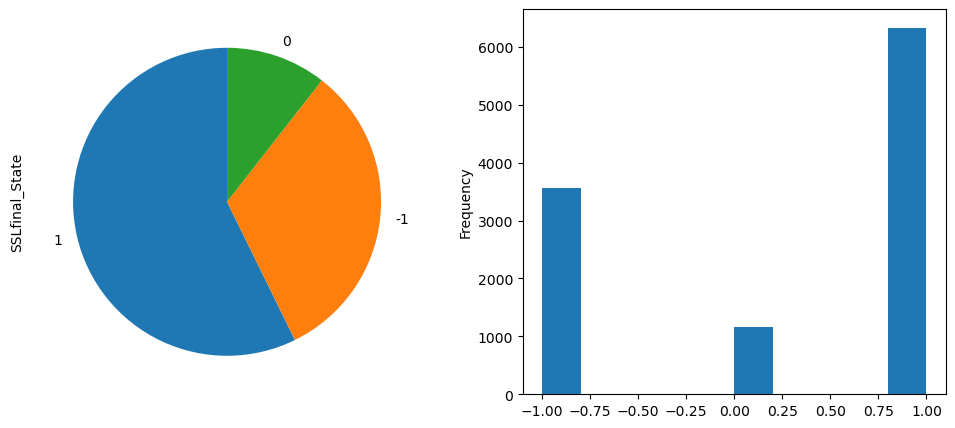

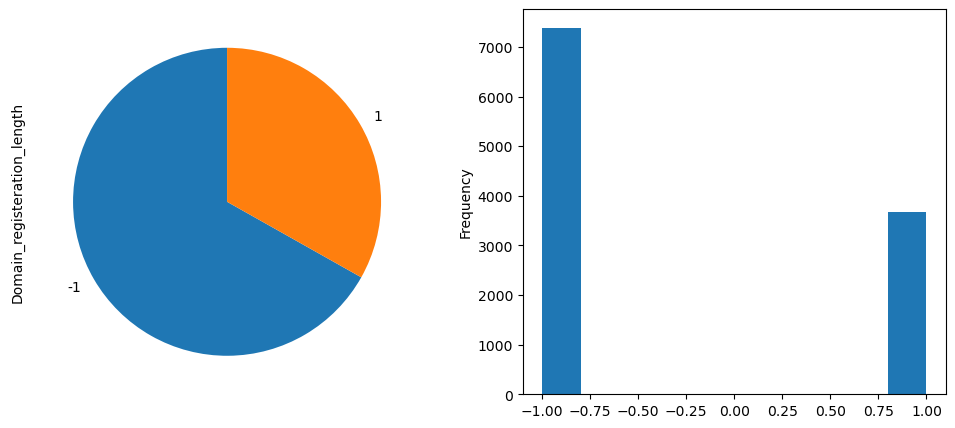

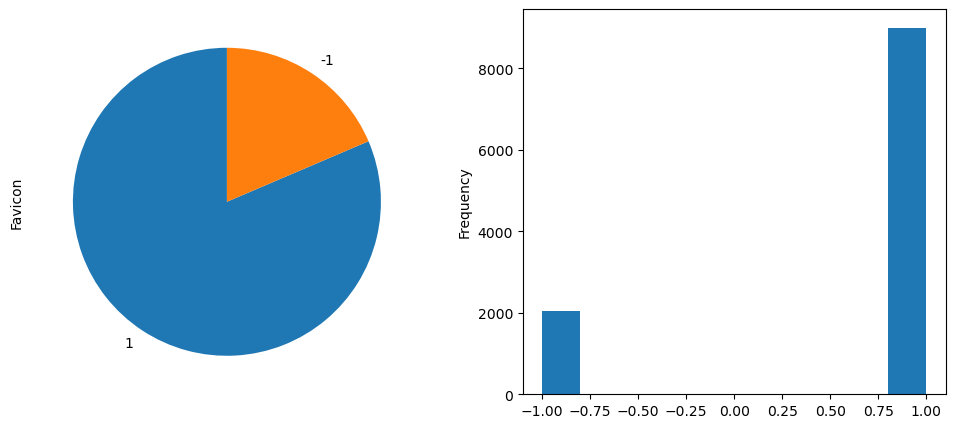

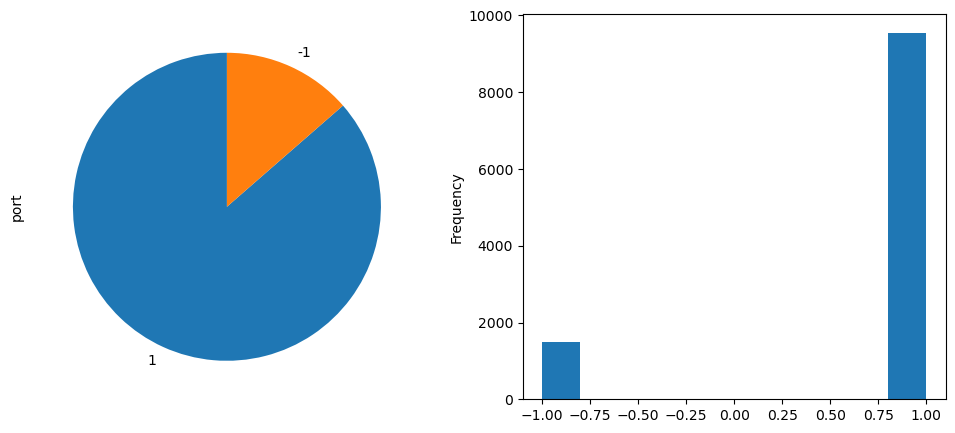

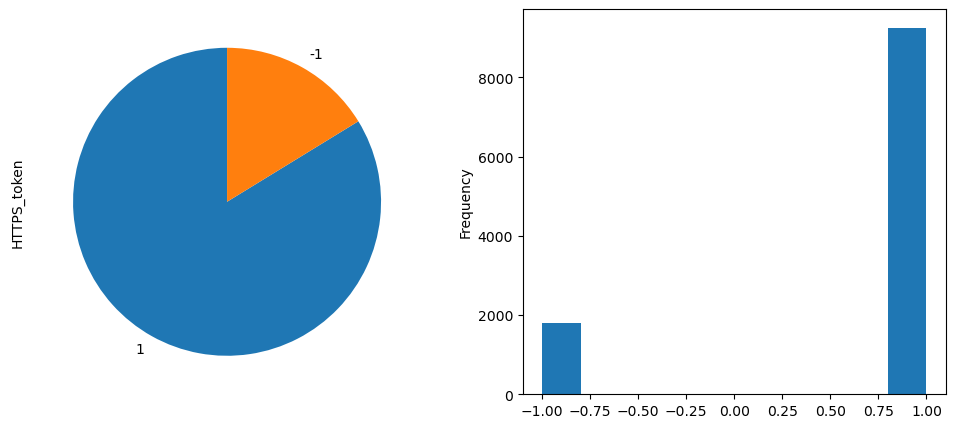

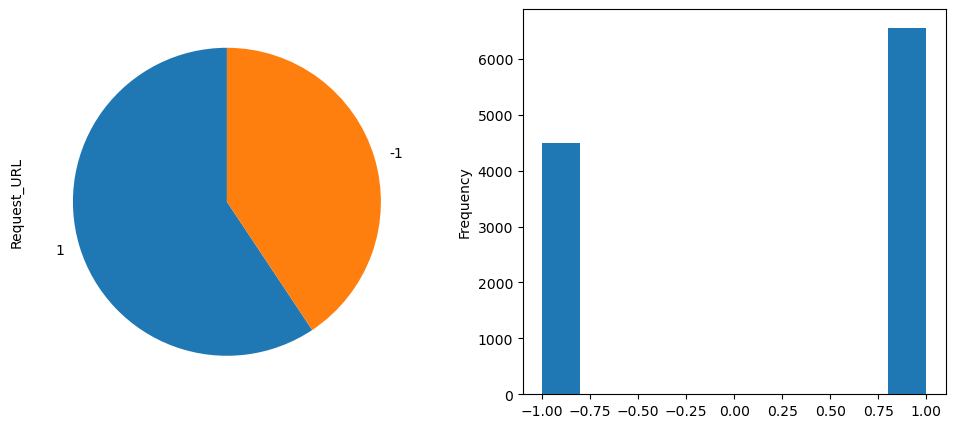

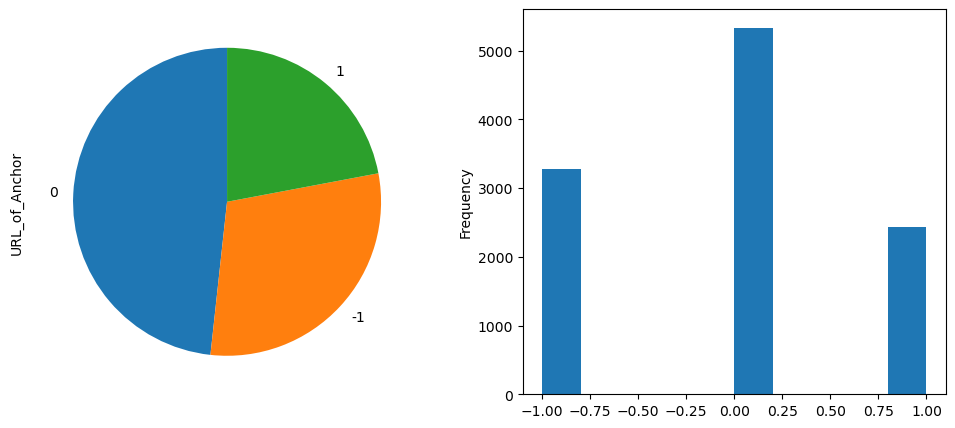

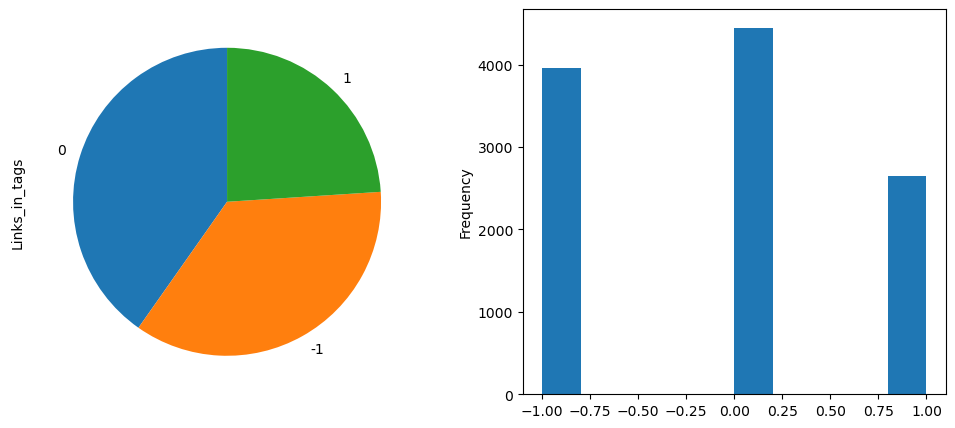

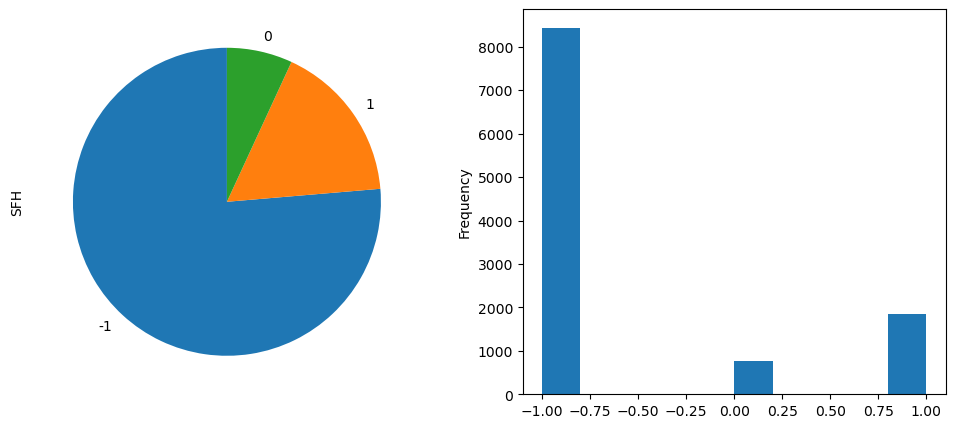

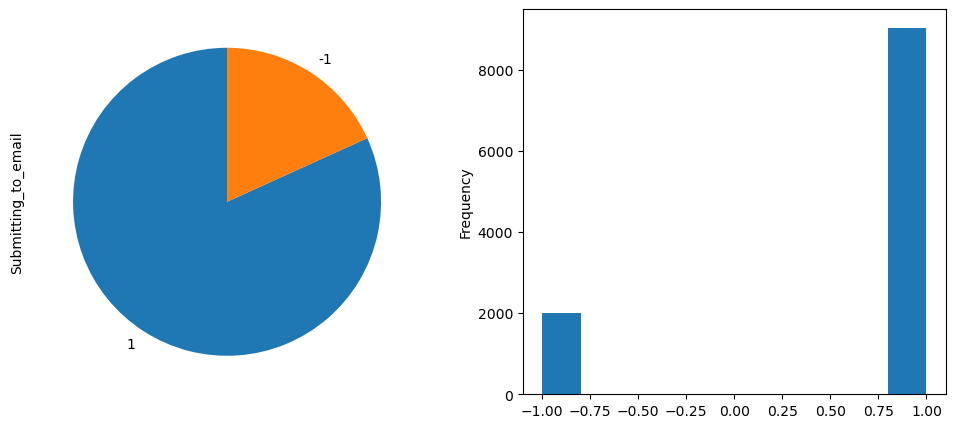

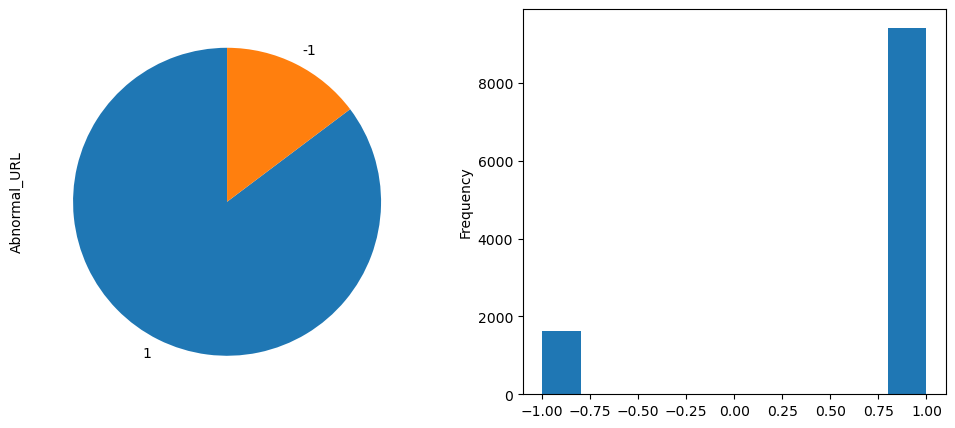

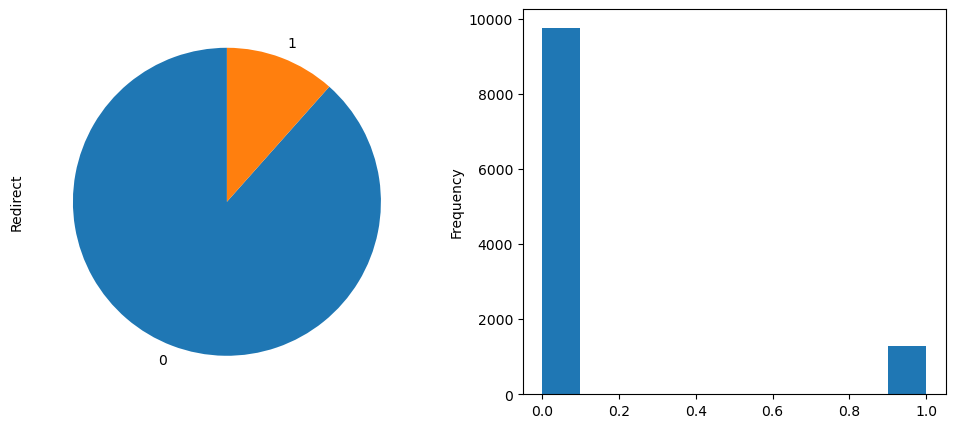

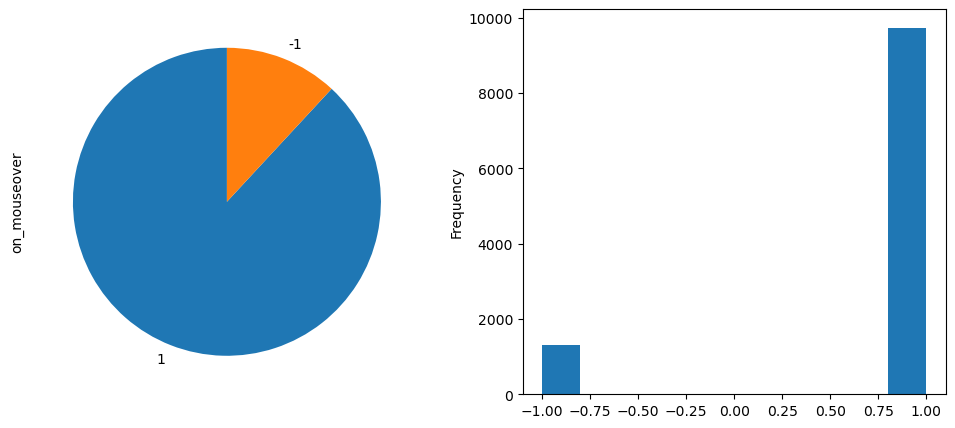

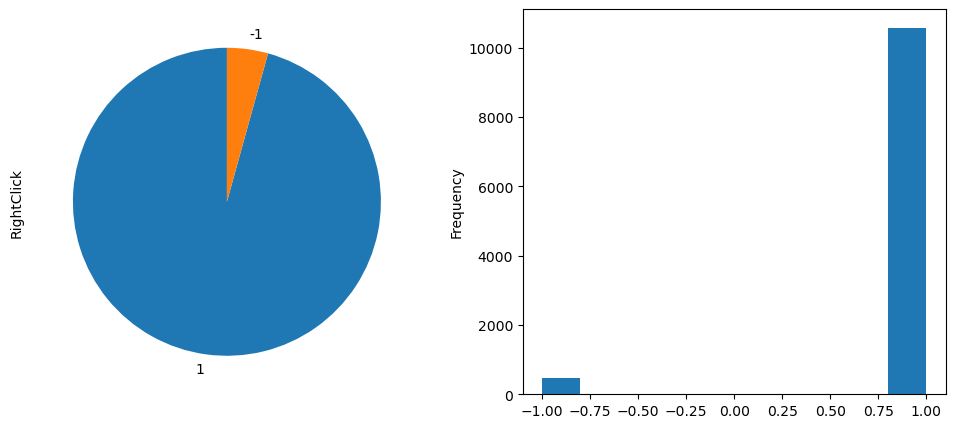

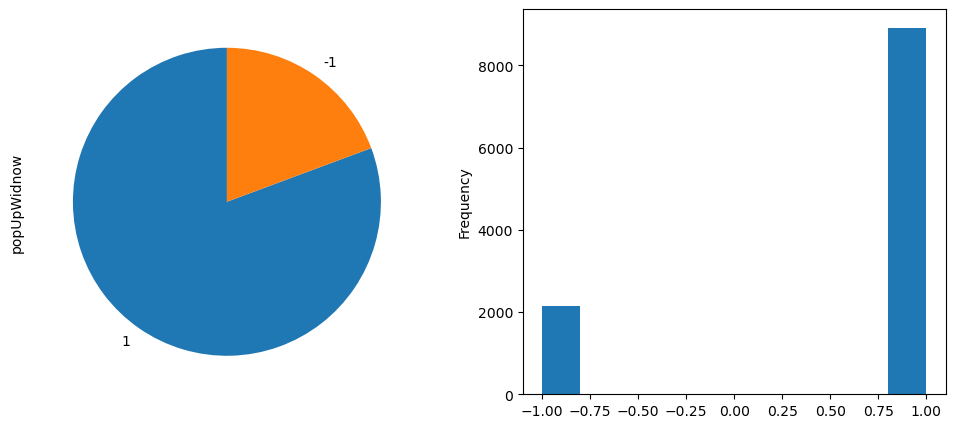

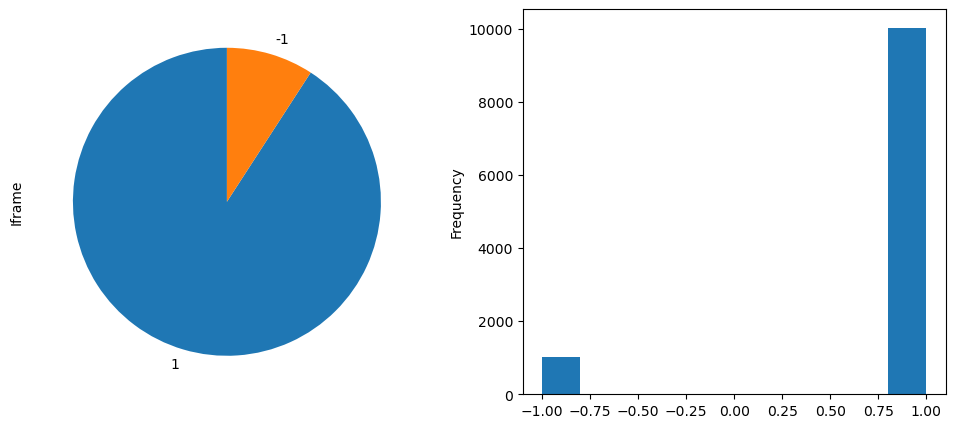

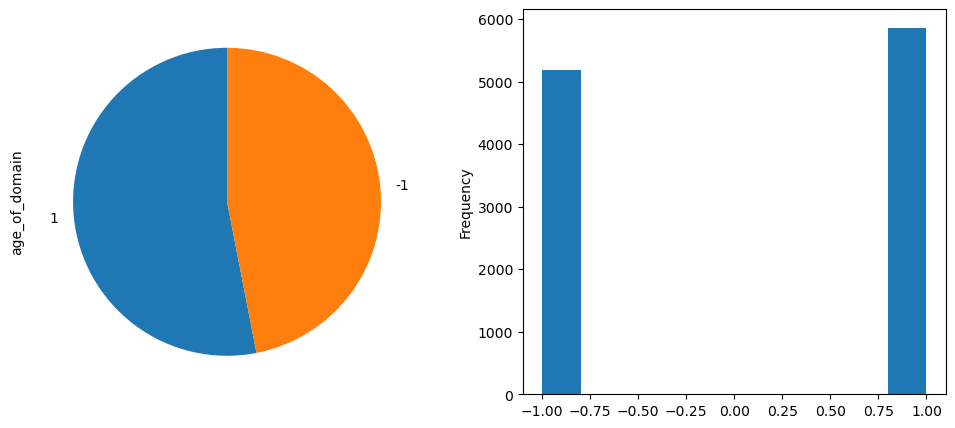

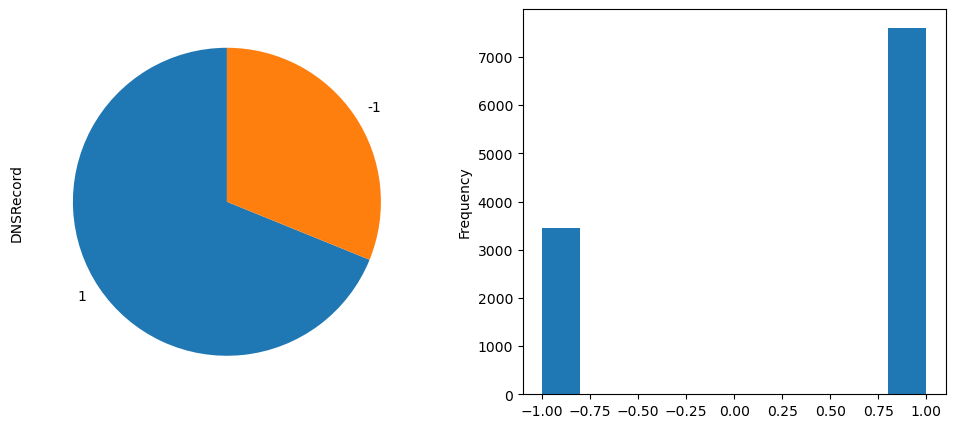

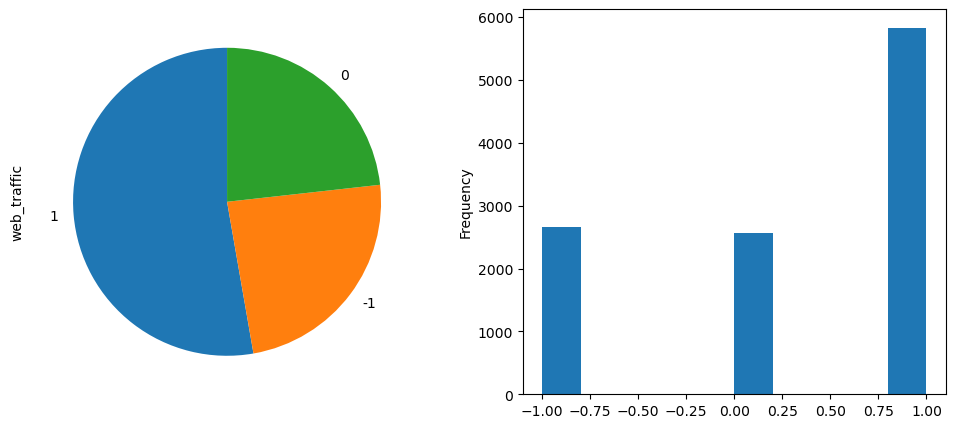

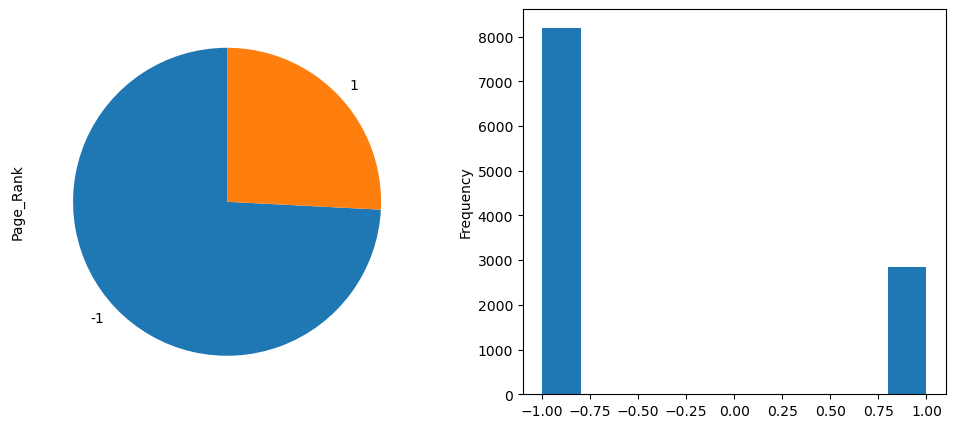

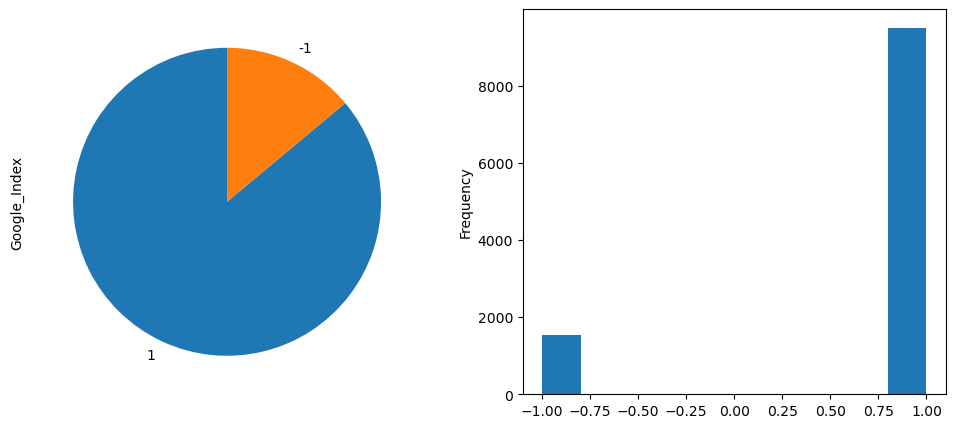

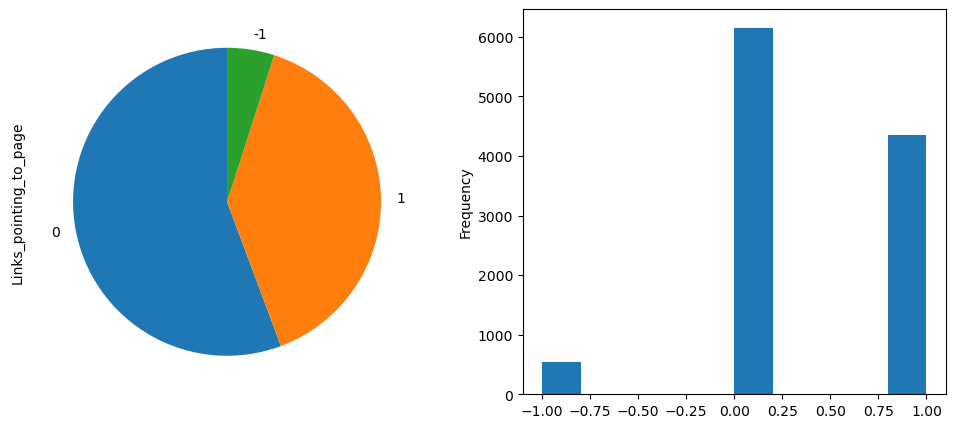

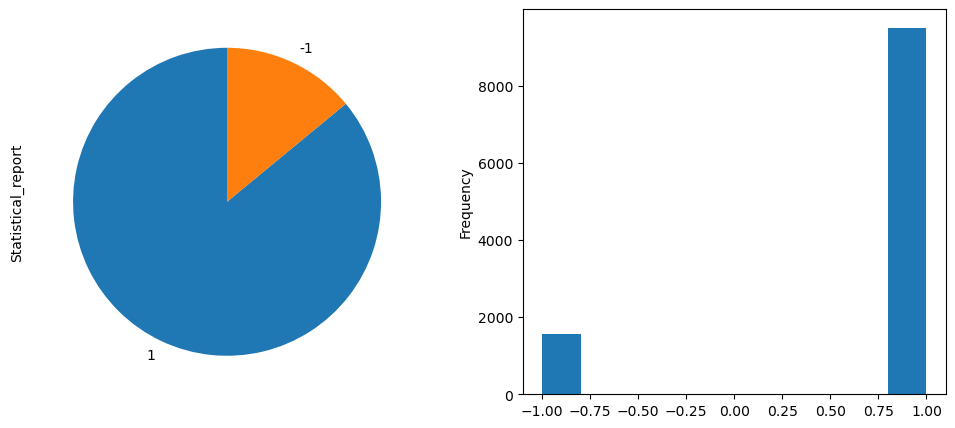

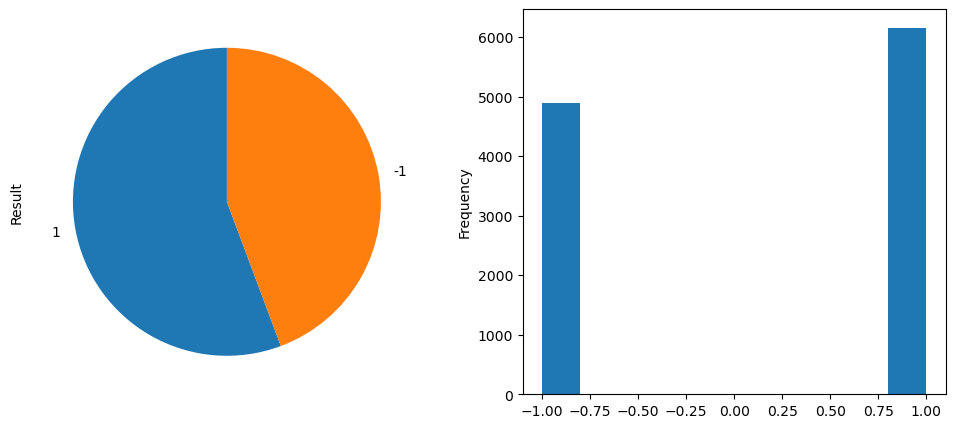

In [190]:
for column in data:
    plot_distribution(data[column])

## Korelacija među značajkama

Kako pojedini modeli kreću od pretpostavke nezavisnosti, potrebno je provjeriti postoji li korelacija među značajkama. Korelaciju moguće je provjeriti korelacijskom matricom koja će na svakom mjestu `(i, j)` imati vrijednost korelacije između i-te značajke i j-te značajke.

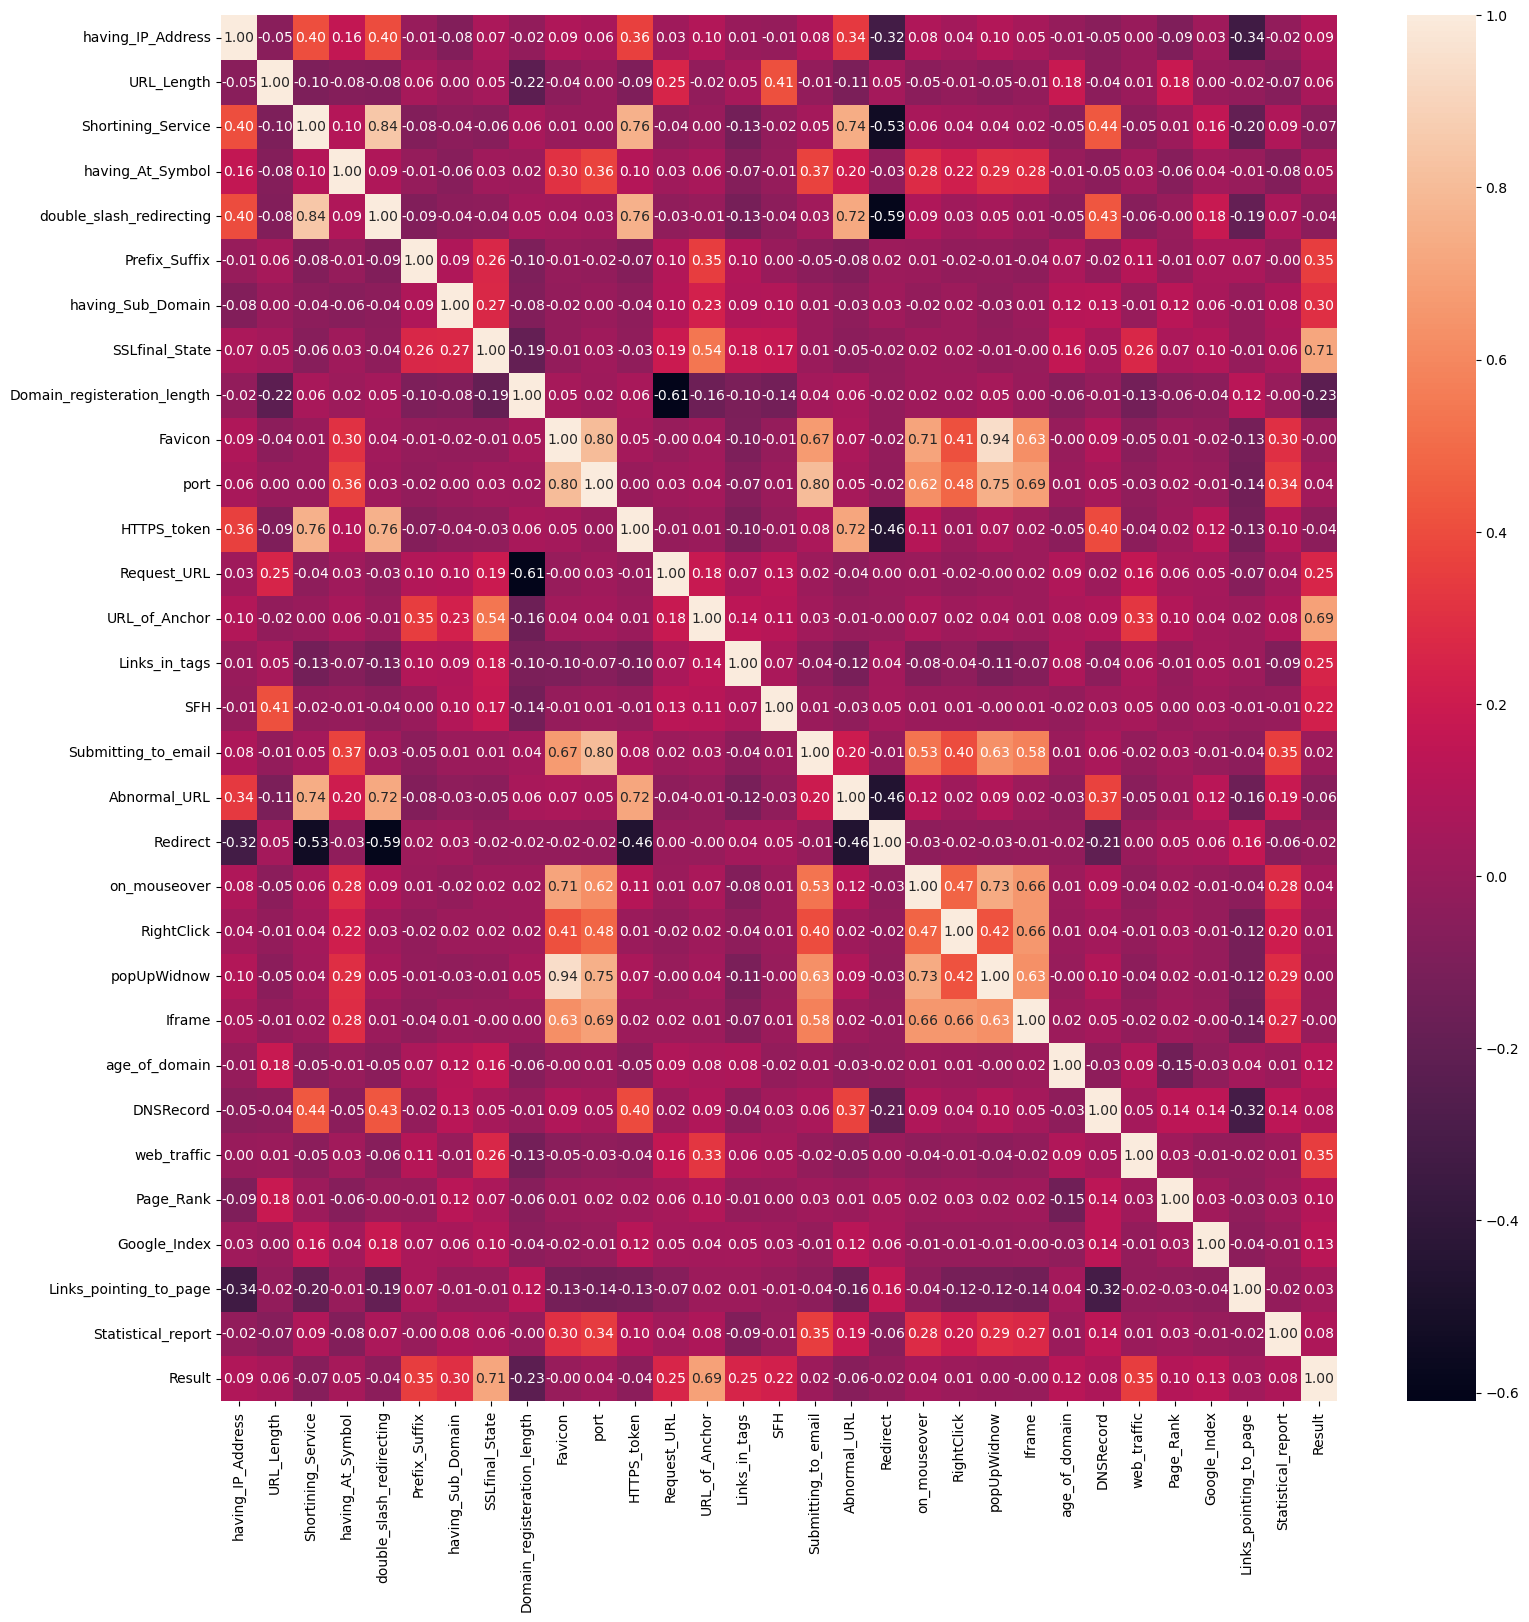

In [191]:
correlation_matrix = data.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.show()

Prema korelacijskoj matrici vidljivo je da postoje umjereno i jako korelirani parovi značajki od kojih najveću kolinearnost imaju:
* r(`popUpWindow` , `Favicon`) = 0.94
* r(`double_slash_redirecting` , `Shorting_Service`) = 0.84
* r(`port` , `Favicon`) = 0.80
* r(`Submitting_to_email` , `port`) = 0.80

Kako bi kasniji modeli bolje radili potrebno je izbaciti kolinearnost iz podataka tako da se izbace pojedine značajke.

In [192]:
data.drop(columns=['Favicon', 'double_slash_redirecting', 'port'], inplace=True)